# EE 538: Analog Integrated Circuit Design

## Winter 2021

## Instructor: Jason Silver

## Python packages/modules

In [73]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_x2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1, 'b')
    ax.plot(x, y2, 'r')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def nmos_iv_sweep(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/Leff)*(V_gs - V_thn - V_ds[i]/2)*V_ds[i]*(1+lmda*V_ds[i]) , 
                        0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds[i])])) 
    
    return np.array(I_d)

def pmos_iv_sweep(V_sg, V_sd, W, L, lmda):
    u_p = 100                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thp = -0.8                # threshold voltage (device parameter)
    V_ov = V_sg - np.abs(V_thp)
    Ldp = 0.09e-6
    Leff = L - 2*Ldp
    
    I_d = []
    
    for i in range(len(V_sd)):
        I_d.append(np.piecewise(V_sd[i], [V_sd[i] < V_ov, V_sd[i] >= V_ov],
                       [u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp) - V_sd[i]/2)*V_sd[i]*(1+lmda*V_sd[i]) , 
                        0.5*u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp))**2*(1+lmda*V_sd[i])])) 
    
    return np.array(I_d)

def nmos_iv_sat(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = 0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds)
    
    return I_d

def nmos_diff_pair(V_id, I_ss, R_D, W, L, V_dd):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_dp = I_ss/2 + 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)
    I_dm = I_ss/2 - 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)

    return I_dp, I_dm

# Lecture 5 - Differential Amplifiers

## Announcements

 - Assignment 4 posted, due Sunday February 7
     - PDF submission on Canvas
 - Midterm exam will be available February 15-21 (due the 21st)
     - 180-minute time limit, administered as a Canvas quiz
     - Will cover material through Lecture 5
         - MOS physics/operation
         - Small-signal model
         - Single-stage amplifiers
         - Current mirrors and biasing
         - Differential amplifiers

## Week 5

 - Chapter 4 of Razavi (differential amplifiers)
 - Chapter 5 of Razavi (current mirrors)
     - Section 5.3 Active Current Mirrors

## Overview

 - Last time...
    - Amplifier output swing
    - Current references
    - Low-voltage cascode biasing
    - Source follower
 - Today...
    - Single-ended vs differential signaling
    - Differential amplifiers
    - 5-transistor MOS OTA

## Single-ended amplifiers

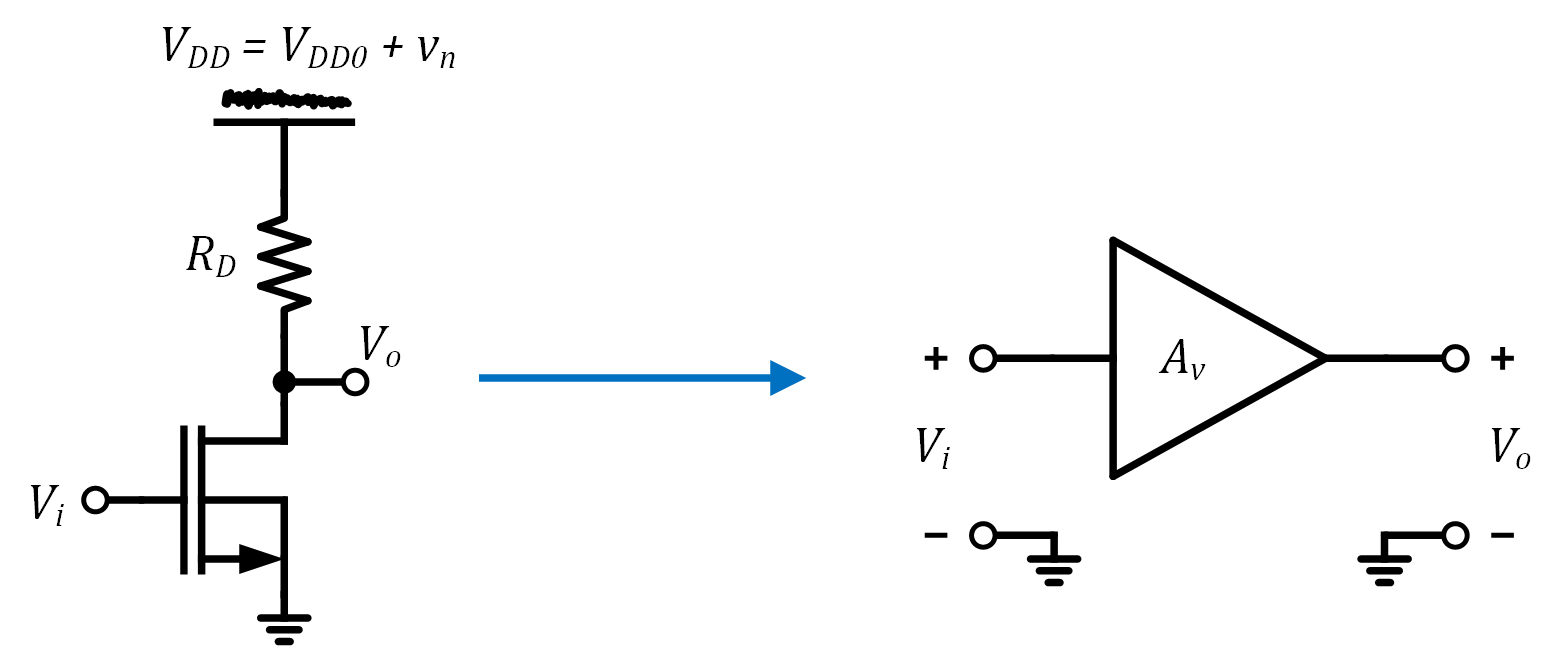

 - "Single-ended" circuits are those whose inputs/outputs are referenced to a $DC$ voltage (usually $V_{DD}$ or $GND$)
 
 - Supply voltages are not ideal $DC$ voltages, but have time-varying content in the form of noise/disturbances (i.e. $V_{DD} = V_{DD0} + v_n$)
 
 - As a result, the signal voltage can easily be corrupted by noise on the reference (e.g. $GND$)
 

- In the case of a resistively-loaded commmon-source amplifier, supply noise adds directly to the amplifier output:
 
\begin{align}
V_{o} &= V_{DD} - I_D\cdot R_D - 0V + v_{n,gnd}\\
\\
&= V_{DD0} + v_{n,vdd} - (I_{DC} + g_m v_i)R_D + v_{n,gnd}
\end{align}

 - The signal voltage is thus
 
\begin{equation}
v_o = -g_m\cdot v_i R_D + v_{n,vdd} + v_{n,gnd}
\end{equation}

 - How can we mitigate this?

## Differential amplifiers

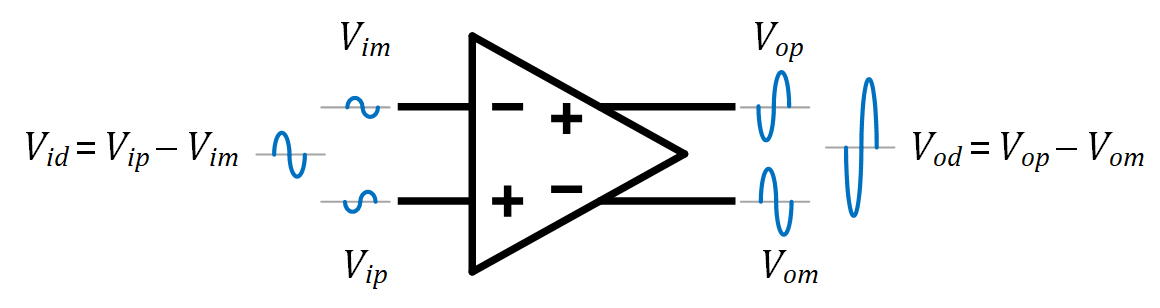

 - Differential amplifiers operate with *differential* input and output signals 
 - Differential signals comprise the *differences* between differential voltage pairs
 - Because they are $180^\circ$ out of phase with each other, the amplitudes of differential signals ($V_{id}$, $V_{od}$) are twice that of the individual voltages

## Differential vs common-mode

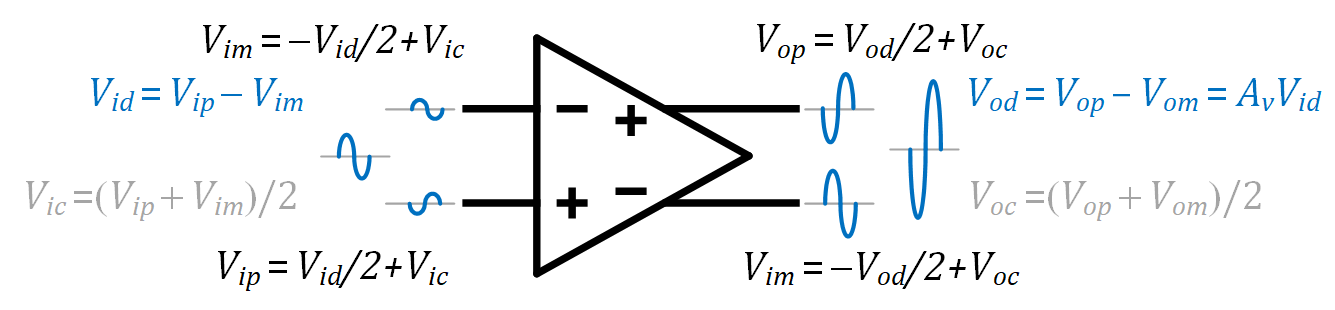

 - Each input or output voltage consists of a common-mode and a differential-mode component
 - The differential-mode voltages at the input ($V_{id}$) and output ($V_{od}$) are related through the voltage gain of the amplifier ($A_v$)
 - The common-mode voltages at the input ($V_{ic}$) and output ($V_{oc}$) are (ideally) independent of each other
 - In this sense, common-mode signals are suppressed, while differential signals are amplified

## Differential signal, common-mode noise

 - Let's take a look at an example of differential versus common-mode signal components

In [36]:
# Define a sinusoidal signal with DC level
f = 1e3
w = f*2*np.pi
t = np.linspace(0,3e-3,num=300)
V_dd = 3.3
V_cm = V_dd/2 
v_plus = V_cm + 1e-3*np.sin(w*t)
v_minus = V_cm - 1e-3*np.sin(w*t)

# Define a random noise source
mu = 0
sigma = 100e-6
v_noise = np.random.normal(mu, sigma, 300)

# Combine the two
vd_plus = v_plus + v_noise
vd_minus = v_minus + v_noise
v_diff = vd_plus - vd_minus


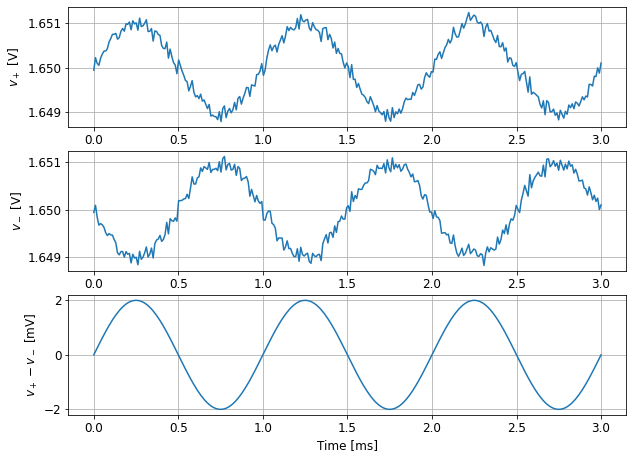

In [37]:
plot_xy3(1e3*t, vd_plus, vd_minus, 1e3*v_diff,
        'Time [ms]','$v_+$ [V]','$v_-$ [V]','$v_+ - v_-$ [mV]')

 - Differential processing suppresses noise due to a circuit property referred to as *common-mode rejection*
 - In this case, the common-mode rejection is perfect (i.e. infinite), as it is based on arithmetic subtraction
 - Note that many types of noise are *not* common-mode (e.g. thermal noise), and are thus not removed by differential signaling

## SNR advantage

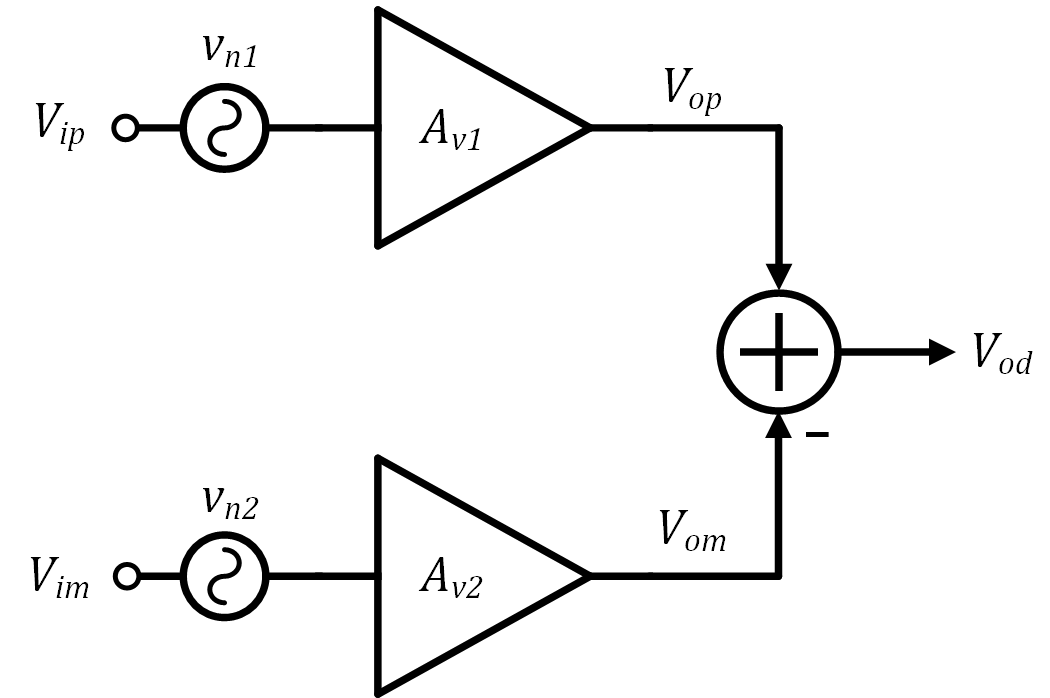

 - All electronic circuits generate thermal noise that corrupts signals and degrades signal-to-noise ratio (SNR) 
 - Differential signaling allows us to take advantage of the fact that independent noise processes are uncorrelated
 - Uncorrelated noise sources ($v_{n1}$ and $v_{n2}$) add in a *mean-square* sense, while differential signals ($V_{ip}$ and $V_{im}$) are correlated and add directly

 

 - For example, $v_{n1}$ and $v_{n2}$ represent the *input-referred* noise of $A_{v1}$ and $A_{v2}$, respectively 

In [38]:
# Define a sinusoidal signal with DC level
f = 1e3
w = f*2*np.pi
t = np.linspace(0,20e-3,num=1000)
V_cm = 0
A_v1 = 1
A_v2 = 1
v_ip = V_cm + 1e-3*np.sin(w*t)
v_im = V_cm - 1e-3*np.sin(w*t)

# Define a random noise source
mu = 0
sigma = 100e-6
v_n1 = np.random.normal(mu, sigma, 1000)
v_n2 = np.random.normal(mu, sigma, 1000)

# Combine the two
v_op = A_v1*(v_ip + v_n1)
v_om = A_v2*(v_im + v_n2)
v_od = v_op - v_om

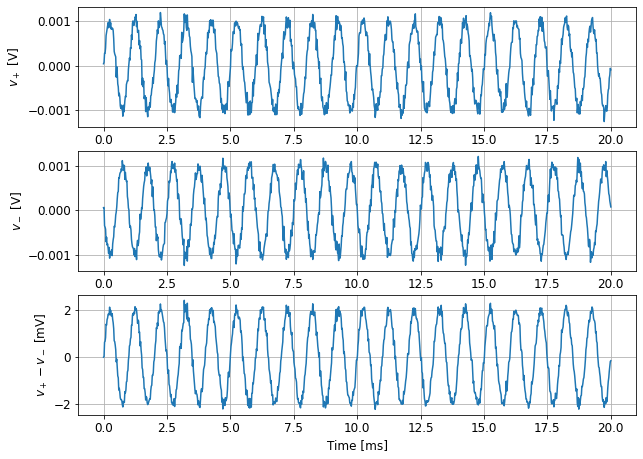

In [39]:
plot_xy3(1e3*t, v_op, v_om, 1e3*v_od,
        'Time [ms]','$v_+$ [V]','$v_-$ [V]','$v_+ - v_-$ [mV]')

 - To understand the the noise advantage offered by differential signaling, we need to compare the SNR of the individual amplifier outputs with that of the differential signal

In [40]:
snr1 = np.std(A_v1*v_op)/np.std(A_v1*v_n1)
snr2 = np.std(A_v2*v_om)/np.std(A_v2*v_n2)
snr_diff = np.std(v_od)/np.std(A_v1*(v_n1+v_n2))

 - The signal-to-noise ratio of the individual outputs are approximately equal and given by

In [41]:
print('The SNR for v_op is', snr1)
print('The SNR for v_om is', snr2)

The SNR for v_op is 7.054509679327141
The SNR for v_om is 7.1293784742064785


 - The SNR of the differential output is given by

In [42]:
print('The SNR for v_od is', snr_diff)

The SNR for v_od is 10.111836903087625


 -  The differential signal amplitude is twice that of the individual amplifier outputs while the total noise is only $\sqrt{2}$ times higher, increasing SNR by a factor of $\sqrt{2}$

## Basic differential pair

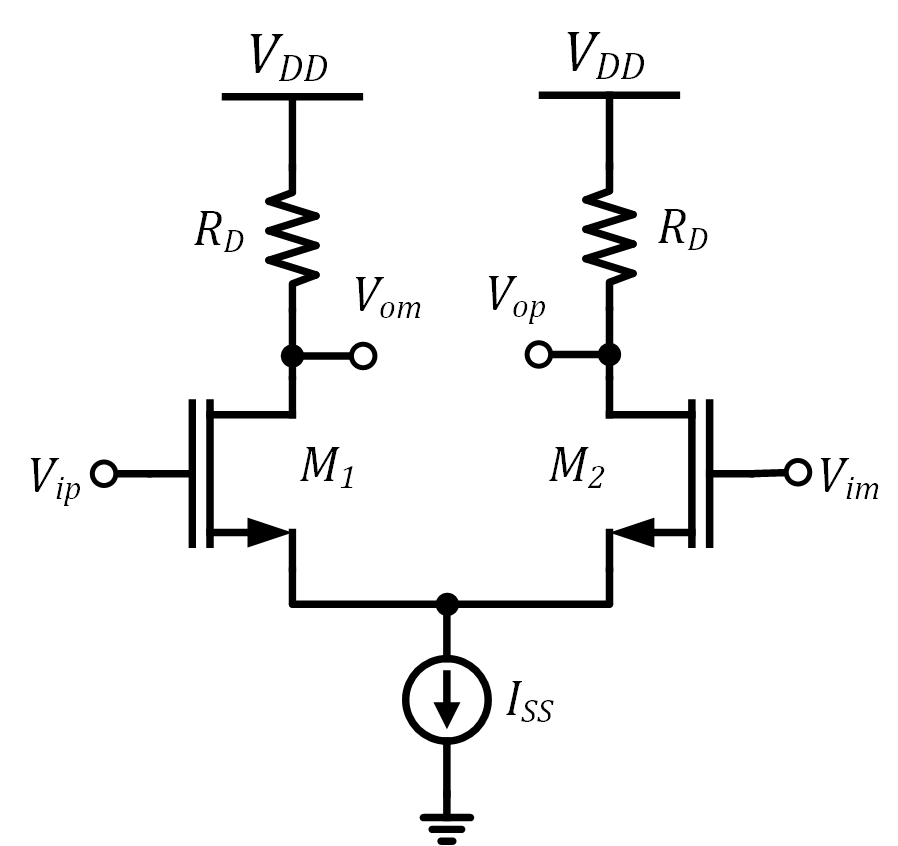

 - When $V_{ip} = V_{im}$, $I_{D1} = I_{D2} = \frac{1}{2} \cdot I_{SS}$
  
 - The output bias ($DC$ operating) point is set by the product of $I_{SS}$ and $R_D$
  
 - As $V_{id}$ changes from very negative to very positive values, the bias current $I_{SS}$ is "steered" from $M_2$ to $M_1$
 
 - $V_{op}$ goes from $V_{DD} – I_{SS} \cdot R_D$ to $V_{DD}$ ($V_{om}$ does the opposite)
 
 - Gain is determined by $I_{SS}$ and sizing of $M_{1,2}$ (current-biased circuit)
 - Gain magnitude is identical to that of a common source with a resistive load

## Large-signal operation

 - When $M_1$ ($M_2$) is in saturation, drain currents are given by
 
\begin{equation}
I_{d1,2} = \dfrac{I_{SS}}{2} \pm \dfrac{\mu C_{ox}}{4}\dfrac{W}{L}(V_{ip}-V_{im})\sqrt{\dfrac{4I_{SS}}{\mu C_{ox} (W/L)} - (V_{ip} - V_{im})^2}
\end{equation}

 - The ouput voltages are then
 
\begin{align}
V_{op} &= V_{DD} - I_{d1}R_D\\
V_{om} &= V_{DD} - I_{d2}R_D
\end{align}

 - The differential voltage is their difference: 

\begin{equation}
V_{od} = V_{op} - V_{om}
\end{equation}


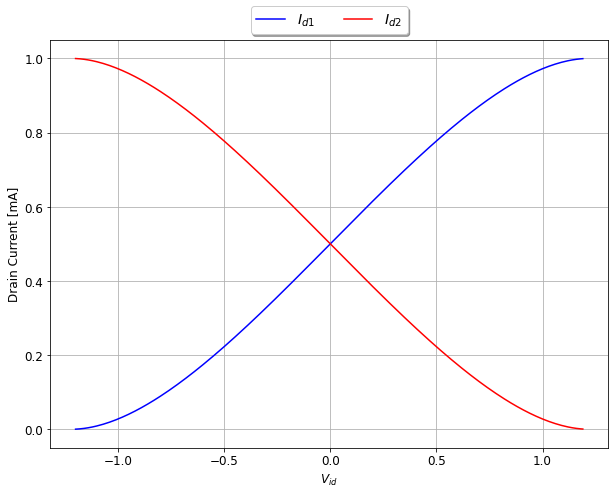

In [83]:
V_dd = 3
R_D = 1e3
I_SS = 1e-3
V_id = np.arange(-1.2, 1.2, step=0.01)
I_d1, I_d2 = nmos_diff_pair(V_id, I_SS, R_D, 10, 1, V_dd)

plot_x2y(V_id, 1e3*I_d1, 1e3*I_d2, r'$V_{id}$', 'Drain Current [mA]', r'$I_{d1}$', r'$I_{d2}$')

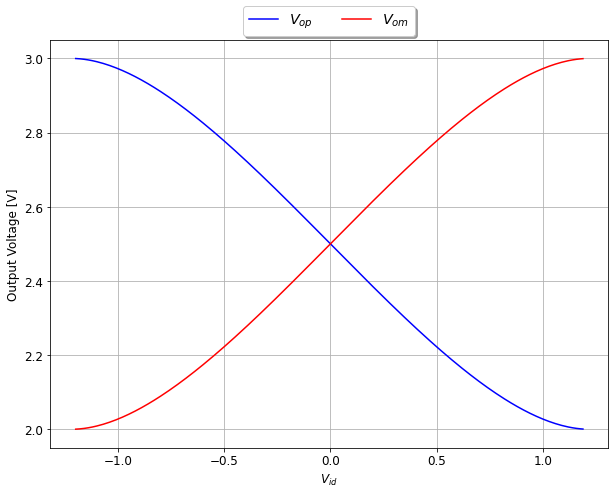

In [84]:
V_op = V_dd - I_d1*R_D
V_om = V_dd - I_d2*R_D
plot_x2y(V_id, V_op, V_om, r'$V_{id}$', 'Output Voltage [V]', r'$V_{op}$', r'$V_{om}$')

 - For $V_{ip}$ ($V_{im}$) less than $V_{th}$, $M_1$ ($M_2$) is off and $V_{om}$ ($V_{op}$) is at $V_{DD}$
 - For $V_{ip}$ ($V_{im}$) $\approx V_{DD}$, $M_1$ ($M_2$) is in triode
 - Gain is at its maximum value for $V_{id} = 0$

## Small-signal model

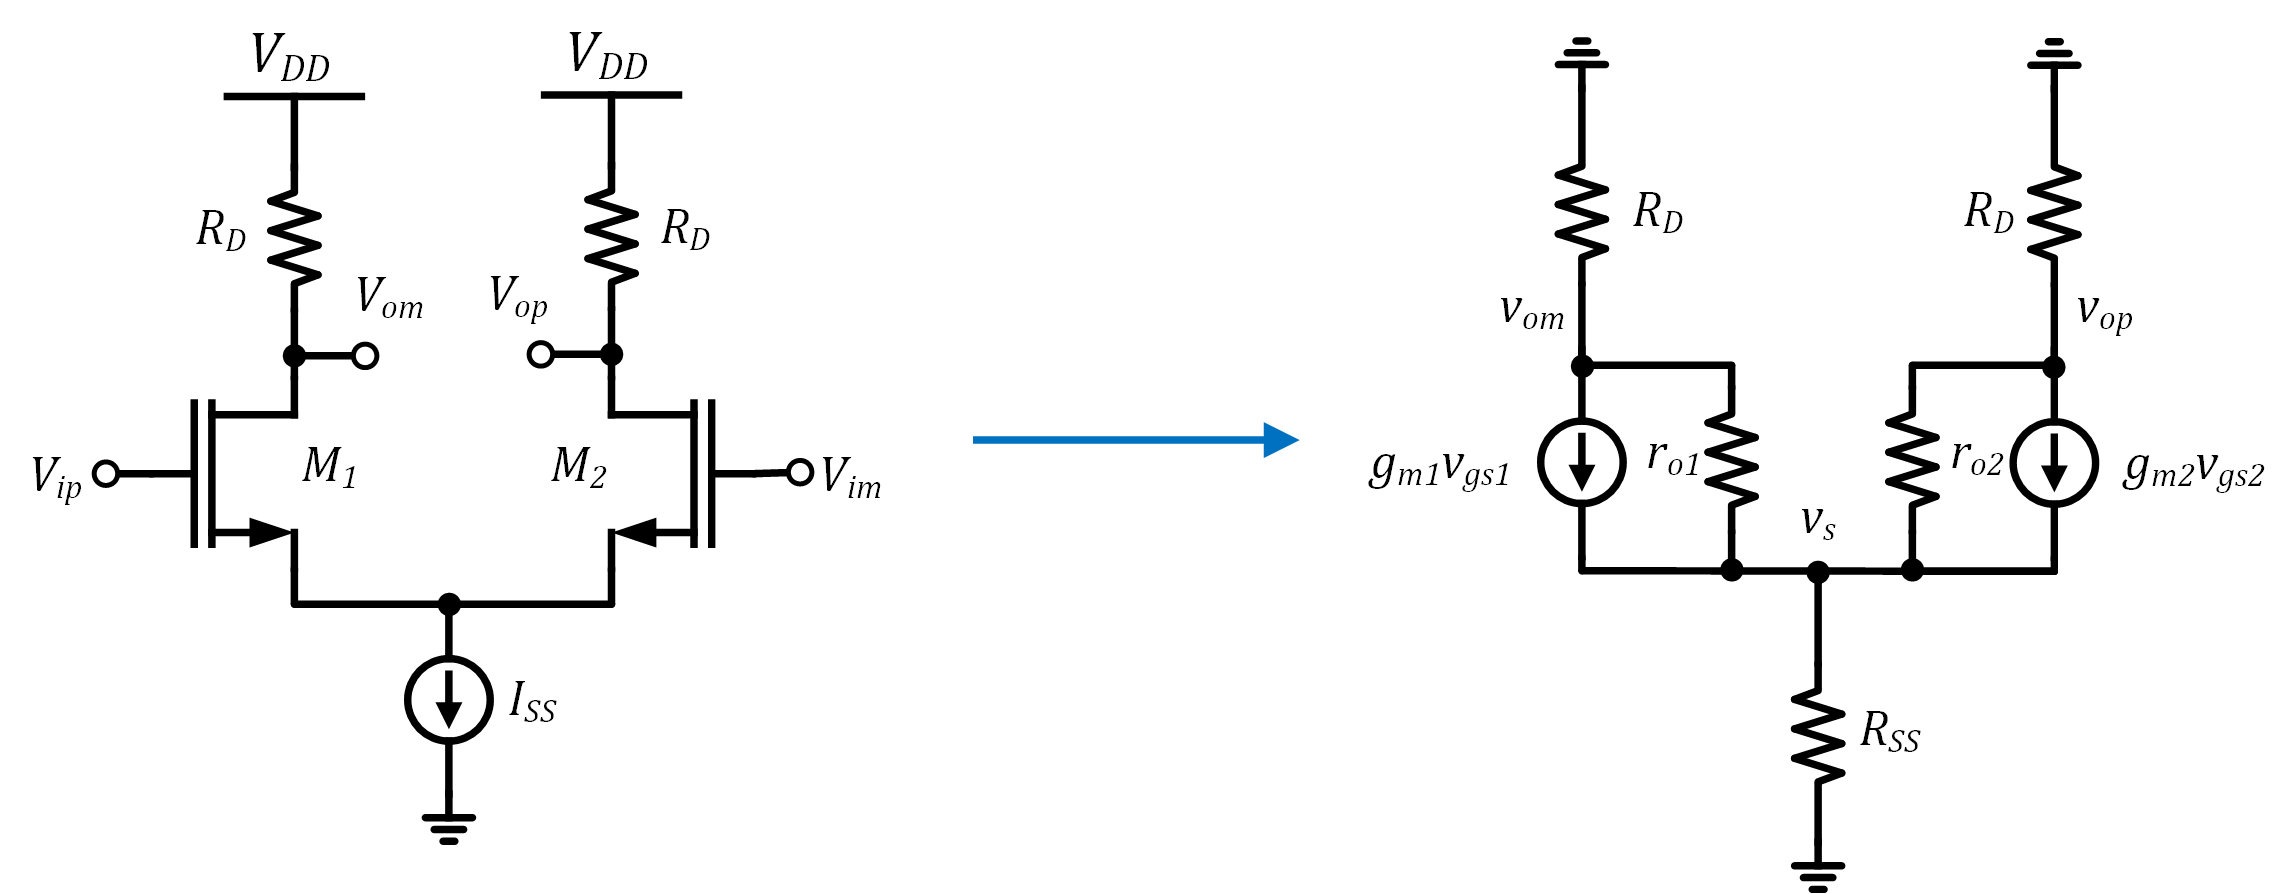

 - $M_1$ and $M_2$ ared designed to be identical, i.e. $(W/L)_1 = (W/L)_2$
 - For $V_{ip} = V_{im}$ ($V_{id} = 0$), $I_{D1} = I_{D2}$, so $g_{m1} = g_{m2}$
 - $R_{SS}$ represents the output resistance of a current source (e.g. MOS $r_o$ or cascode $R_o$)
 - Body effect has been ignored for simplicity, but will typically be present for $M_{1,2}$

## Differential-mode operation

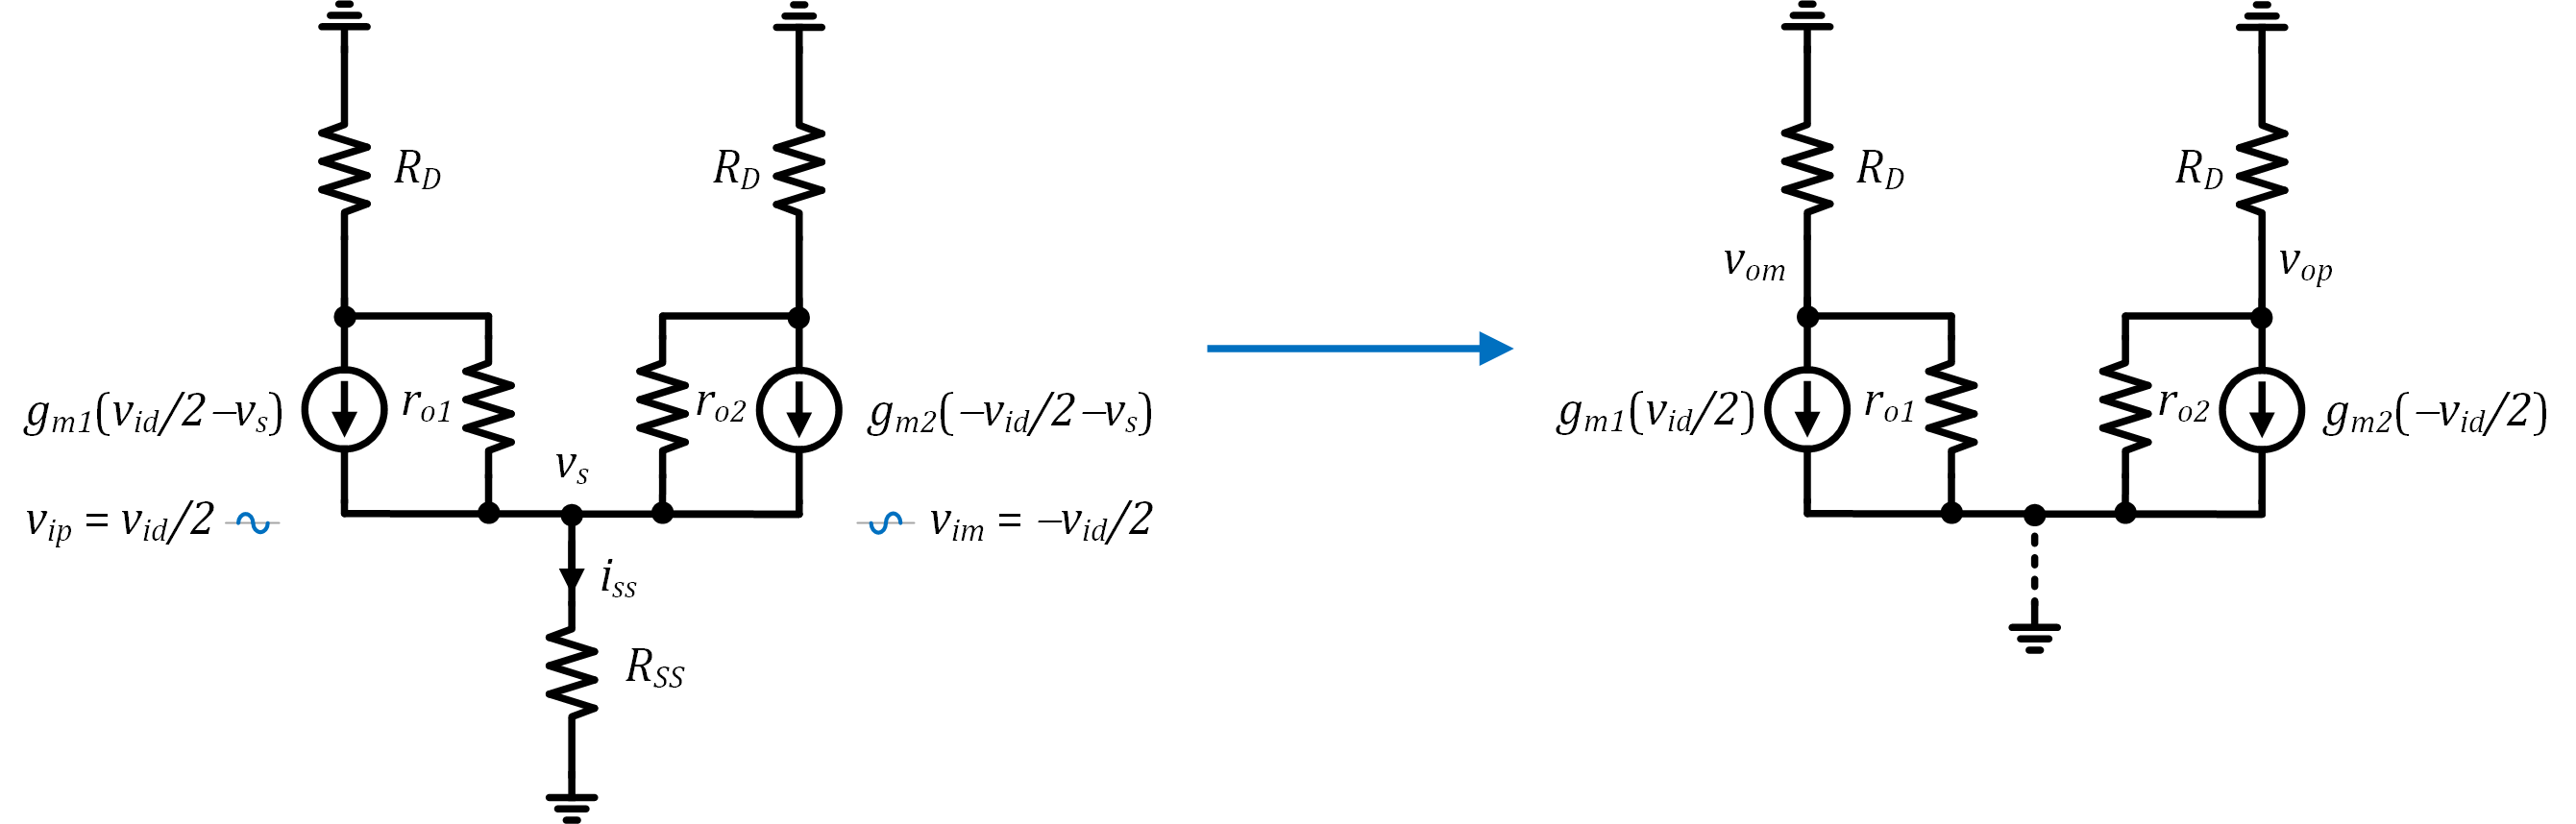

 - Because $g_{m1} = g_{m2}$, the small-signal currents $g_{m1}v_{gs1}$ and $g_{m2}v_{gs2}$ are *equal in magnitude* and *opposite in polarity* for differential inputs
 - Ignoring finite $r_o$, this means that the *net* small-signal current $i_{ss}$ is $0$
 - Because $i_{ss} = 0$, $v_{ss} = 0$, causing $v_s$ to act as a "virtual" ground

## Differential-mode gain

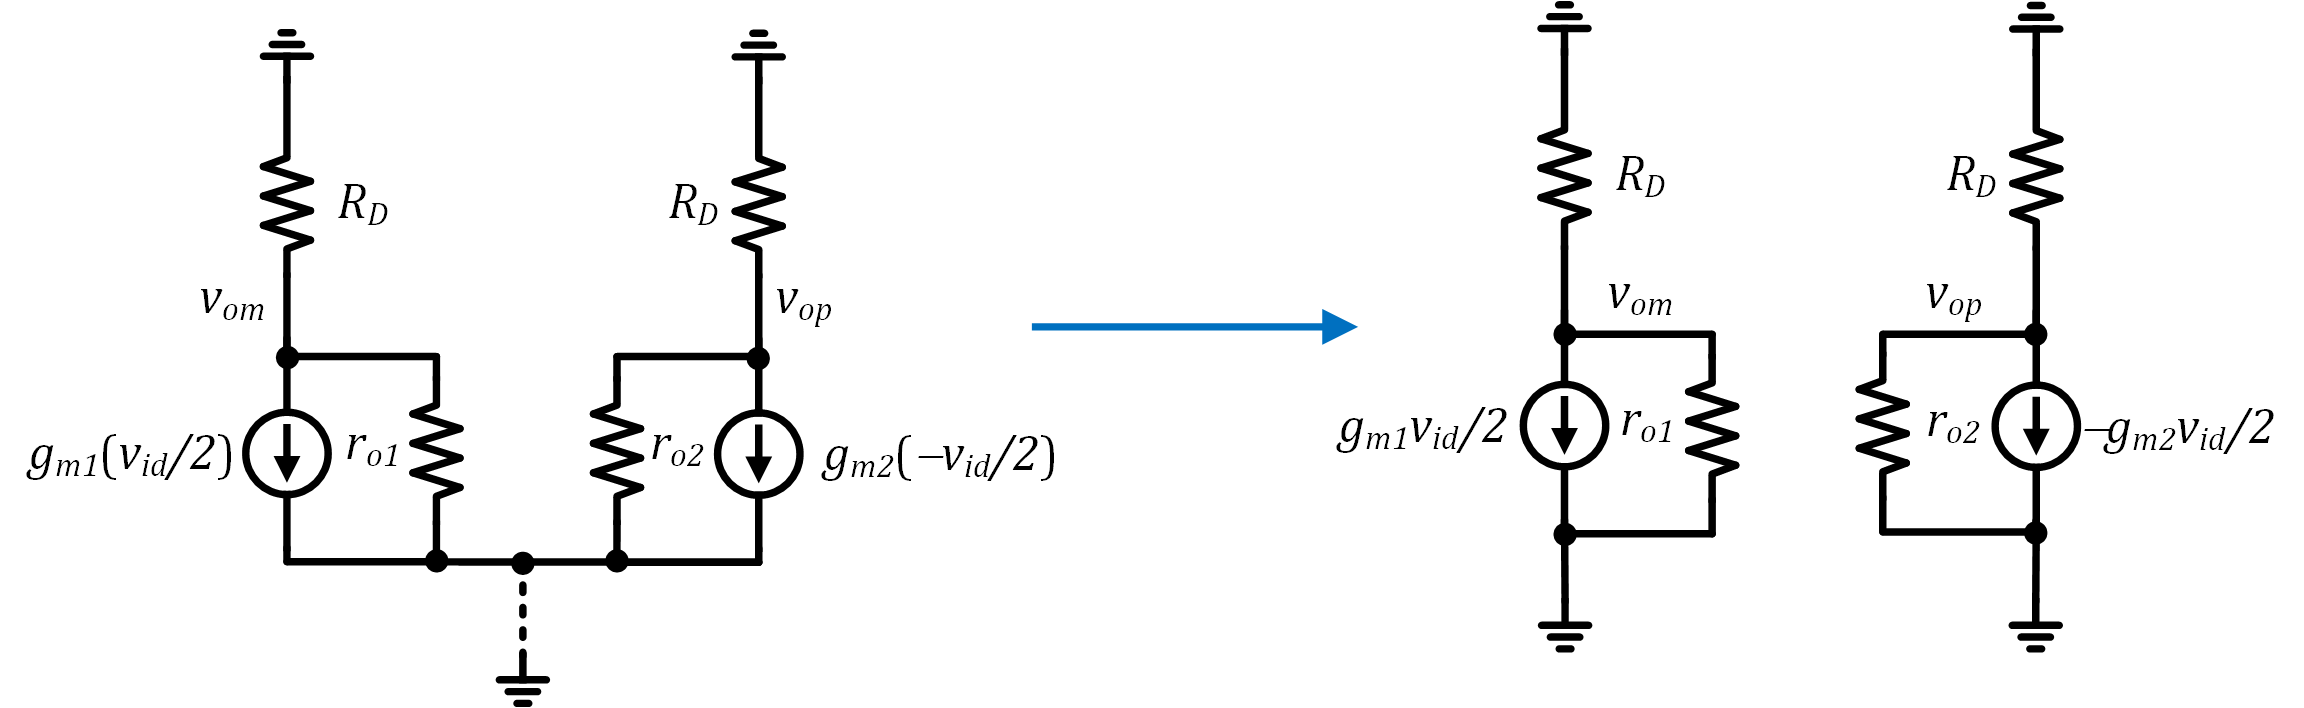

 - Due to the virtual ground, the “half circuit,” which is symmetric for $v_{ip}$ and $v_{im}$, can be used for small-signal analysis
 - Each half-circuit constitutes a common-source amplifier, and can be analyzed separately
 - The differential gain is determined by taking the ratio of the *difference* of the output voltages to that of the input voltages

 - For $v_{om}$, we have 
 
\begin{equation}
v_{om} = -g_{m1}\dfrac{v_{id}}{2}\cdot R_D||r_{o1} \approx -g_{m1}\dfrac{v_{id}}{2}\cdot R_D
\end{equation}

 - Similarly, for $v_{op}$, 
 
\begin{equation}
v_{op} \approx g_{m2}\dfrac{v_{id}}{2}\cdot R_D
\end{equation}

 - The differential gain is thus
 
\begin{equation}
A_{v,d} = \dfrac{v_{od}}{v_{id}} = \dfrac{v_{op} - v_{om}}{v_{id}} = \dfrac{g_{m2}\cdot \frac{v_{id}}{2}\cdot R_D + g_{m1}\cdot \frac{v_{id}}{2}\cdot R_D}{v_{id}}
\end{equation}

 - Since $g_{m1} = g_{m2} = g_m$, we can write
 
\begin{equation}
A_{v,d} = \dfrac{g_{m}\cdot \frac{v_{id}}{2}\cdot R_D + g_{m} \cdot \frac{v_{id}}{2}\cdot R_D}{v_{id}} = \boxed{g_m\cdot R_D}
\end{equation}

## Common-mode operation

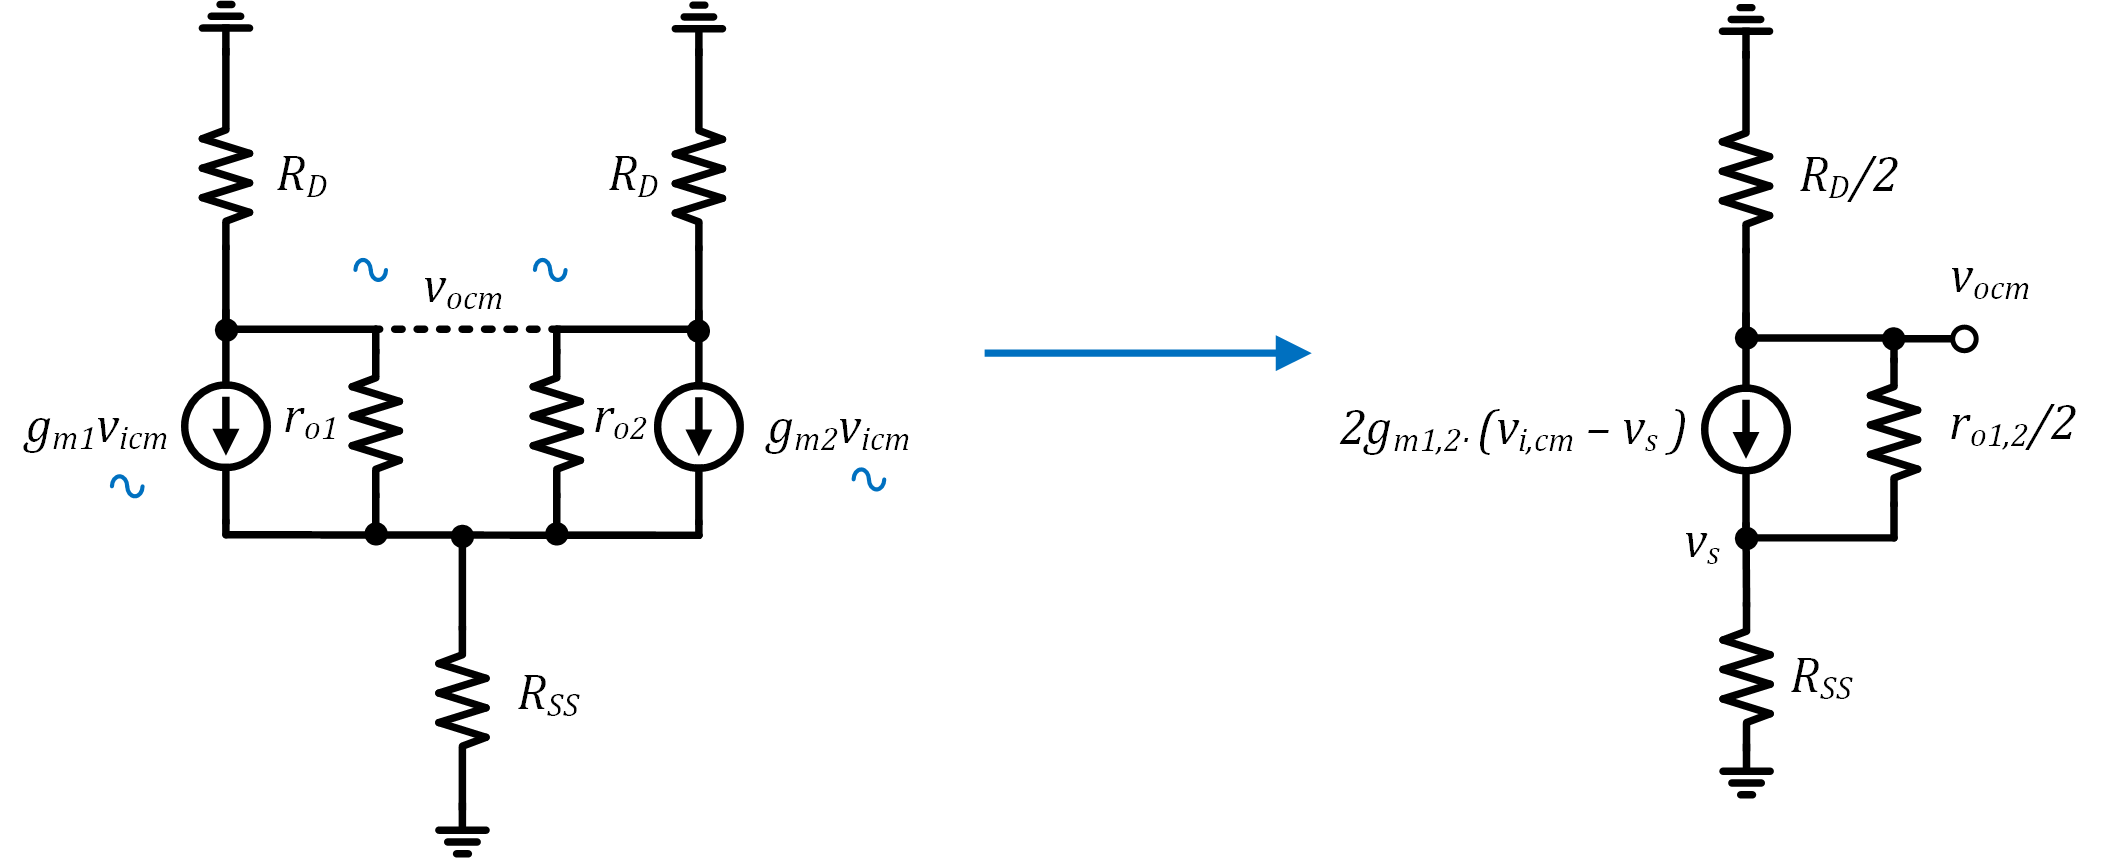

 - Common-mode inputs and outputs are, by definition, equal to each other
 - As a result, common-mode signals can be viewed as virtual short-circuits between respective nodes
 - The result is two *parallel* amplifiers that can be combined to form a single “common-mode amplifier”

## Common-mode gain

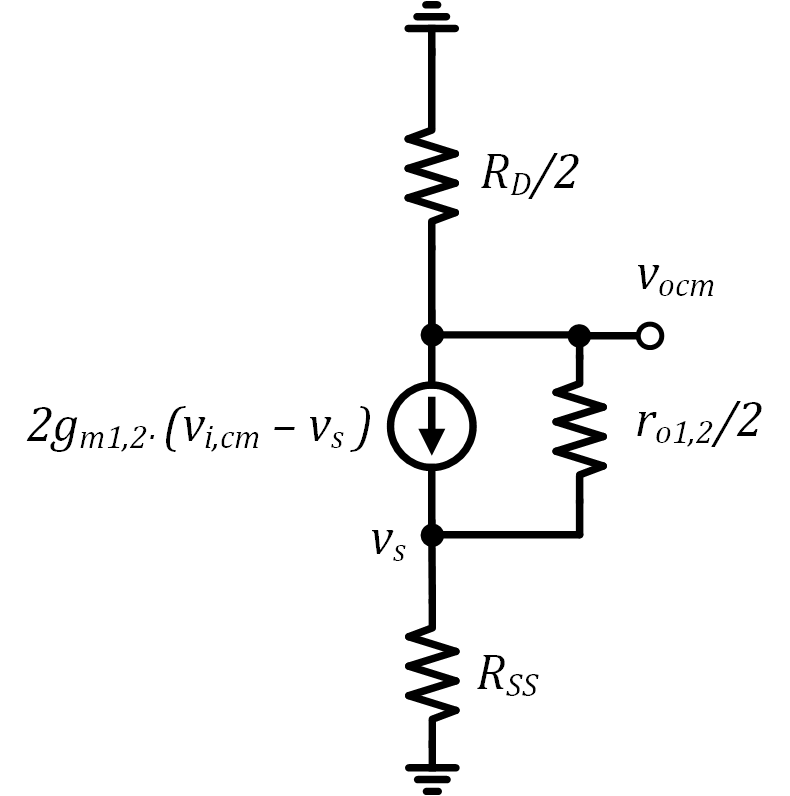

 - The equivalent transconductance is given by

\begin{equation}
G_m = \dfrac{2g_{m1,2}}{1+\dfrac{2R_{SS}}{r_o} + 2g_m R_{SS}} \approx \dfrac{1}{R_{SS}}
\end{equation}

 - The output resistance is
 
\begin{equation}
R_o \approx \dfrac{R_D}{2}
\end{equation}

 - The common-mode gain is thus
 
\begin{equation}
\boxed{ A_{v,CM} = \dfrac{v_{ocm}}{v_{icm}} = -G_mR_o \approx \dfrac{-R_D}{2R_{SS}} }
\end{equation}

 - Common-mode circuit is a source-degenerated stage with degeneration resistance $R_{SS}$
 - $R_{SS}$, since it is the output resistance of a current source, should be large
 - As a result, common-mode gain is much smaller than differential gain

## Common-mode-to-differential gain

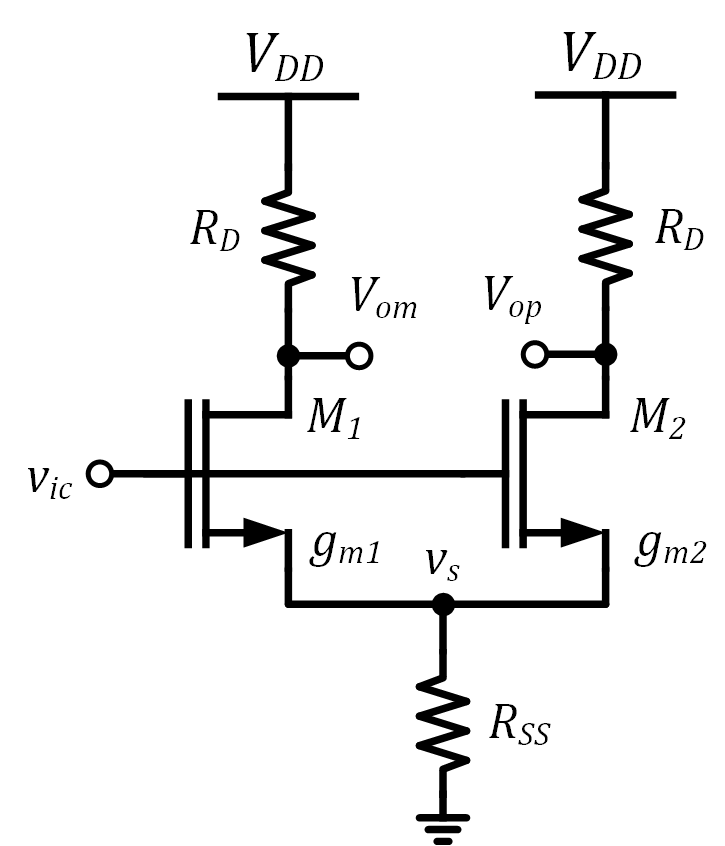

 - Of somewhat greater interest is the conversion of common-mode inputs to differential outputs
 
 - Mismatches in the threshold voltages and drain currents of $M_1$ and $M_2$ result in a differential output that varies with changes in the input common-mode level
 
 - This "common-mode-to-differential conversion" corrupts the differential output and degrades precision
 
 - Let's take a look at how an input common-mode change affects the differential output

 - Source degeneration reduces the effective *common-mode* transconductances of $M_1$ and $M_2$ to
 
\begin{equation} 
G_{m1,2} = \dfrac{g_{m1,2}}{(g_{m1} + g_{m2})R_{SS} + 1}
\end{equation}

- Due to the mismatch between $g_{m1}$ and $g_{m2}$, this gives rise to a differential output voltage of

\begin{equation}
v_{od} = v_{op} - v_{om} = \dfrac{g_{m1} - g_{m2}}{(g_{m1} + g_{m2})R_{SS} + 1}R_D v_{ic}
\end{equation}

 - The circuit thus converts input common-mode variations to a differential error given by a factor given by
 
\begin{equation}
A_{cm-dm} = \dfrac{\Delta g_m R_D}{(g_{m1} + g_{m2})R_{SS} + 1}
\end{equation}

 - Comparison of $A_{cm-dm}$ to the circuit's differential gain gives us the common-mode rejection ratio (CMRR)

\begin{equation}
CMRR = \left| \dfrac{A_{dm}}{A_{cm-dm}} \right| \approx \dfrac{g_m}{\Delta g_m}(2g_{m}R_{SS} + 1)
\end{equation}


## Differential pair with active mirror load (5-transistor OTA)

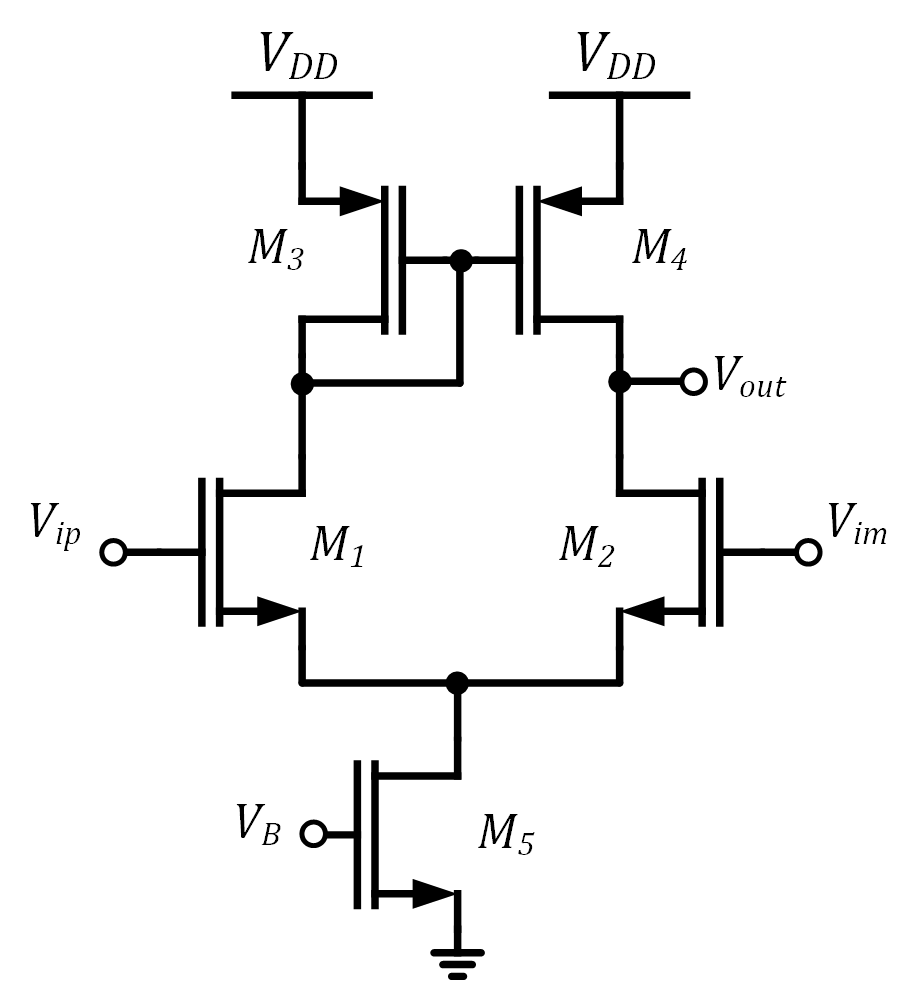

 - Bias is current set by $M_5$, such that

\begin{equation} 
I_{D1} = I_{D2} = \dfrac{I_{D5}}{2}
\end{equation} 
 
 - Assuming $I_{D1} = I_{D2}$ and $V_{ip} = V_{im}$

\begin{equation}
V_{out} \approx V_{DD} - V_{SG3}
\end{equation}

 - Differential pair with single-ended output that comprises the core of most operational amplifiers
 - "Tail" current source $M_5$ biases the amplifier (may also be a cascode current source)
 - "Active" current mirror of $M_3$, $M_4$ converts differential signal current into a single-ended output

## Small-signal model

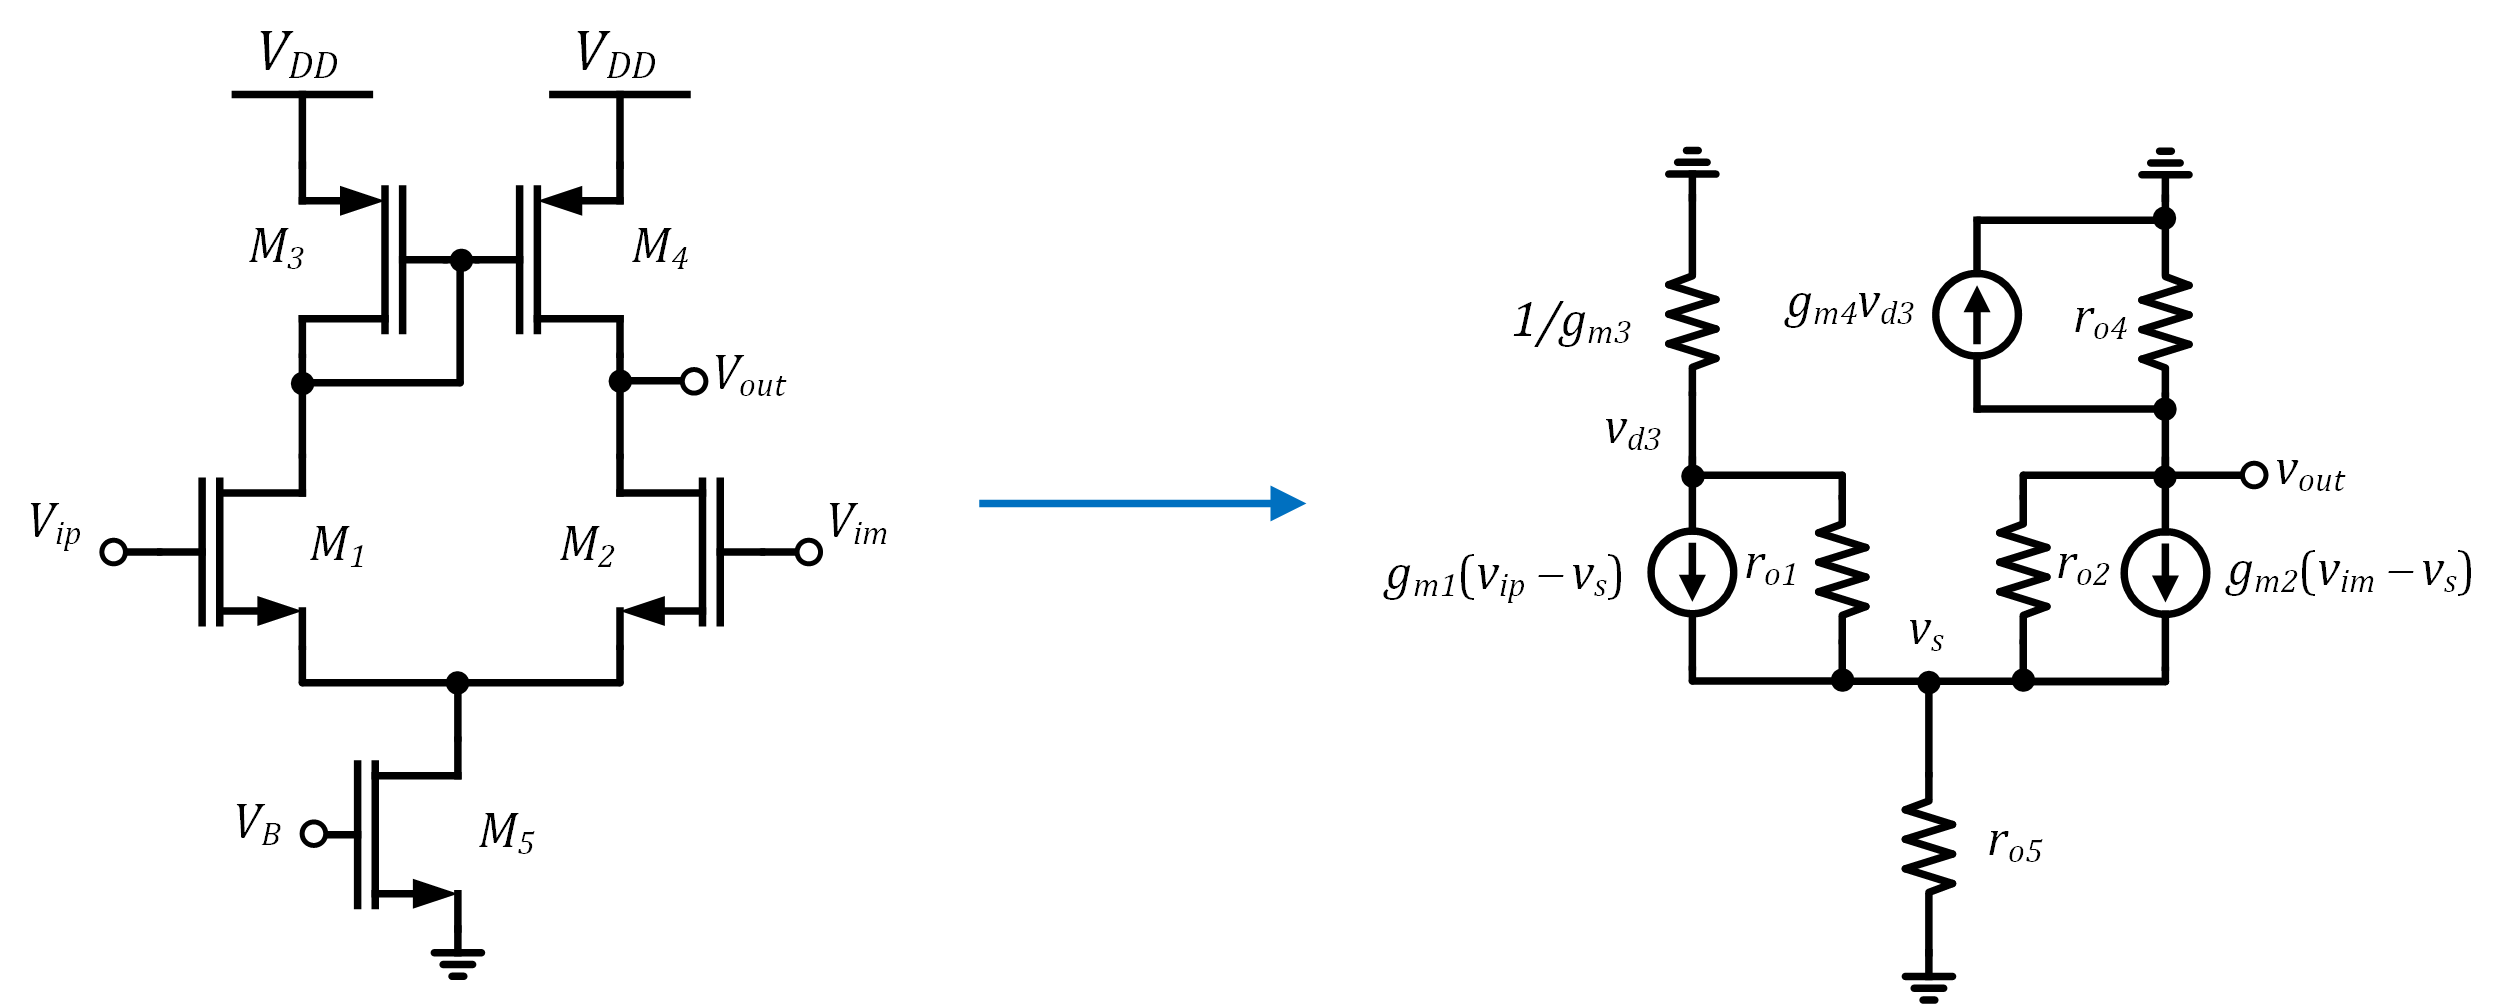

 - In a small-signal sense, diode-connected $M_3$ behaves as a resistance $1/g_{m3}$
 - Current mirror copies $M_3$'s small-signal current to $M_4$
 - Impedances looking into drains of $M_1$ and $M_2$ are not the same, so the circuit is somewhat assymetric

## Small-signal analysis

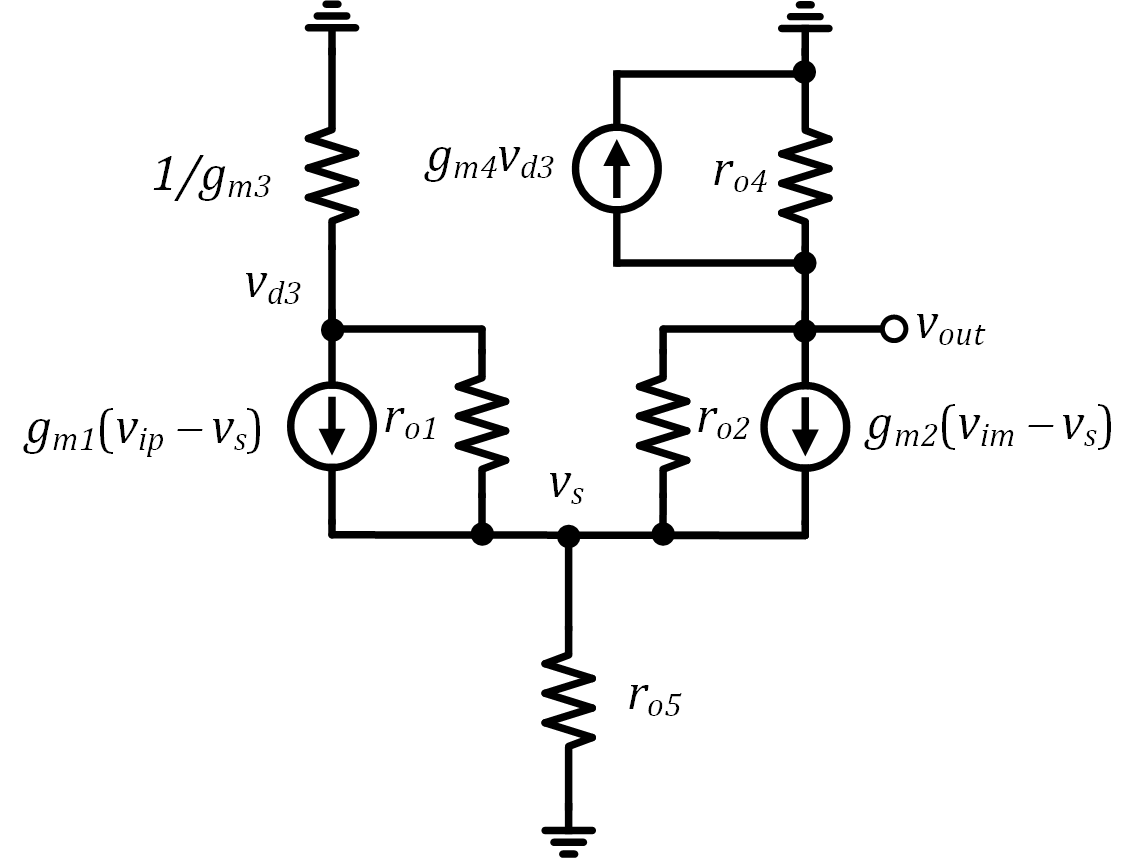

\begin{equation}
v_s \approx 0
\end{equation}

\begin{equation}
v_{d3} \approx -\dfrac{g_{m1}}{g_{m3}}v_{ip}
\end{equation}

\begin{equation}
g_{m3} = g_{m4}
\end{equation}

\begin{equation}
\boxed{g_{m4}v_{d3} \approx -g_{m4}\dfrac{g_{m1}}{g_{m3}}v_{ip} = -g_{m1}v_{ip}}
\end{equation}

 - $v_s$ again acts as a virtual ground due to the symmetry of the circuit 
 - Neglecting $r_{o1}$ and $r_{o3}$, the current in $M_3$ is equal to $g_{m1} (v_{ip} - v_s)$
 - The "active" current mirror mirrors this current through $M_4$'s transconductance, $g_{m4}$
 - The output current is thus the *difference* of $g_{m2}v_{im}$ and $g_{m1}v_{ip}$

## Differential transconductance (G<sub>m</sub>)

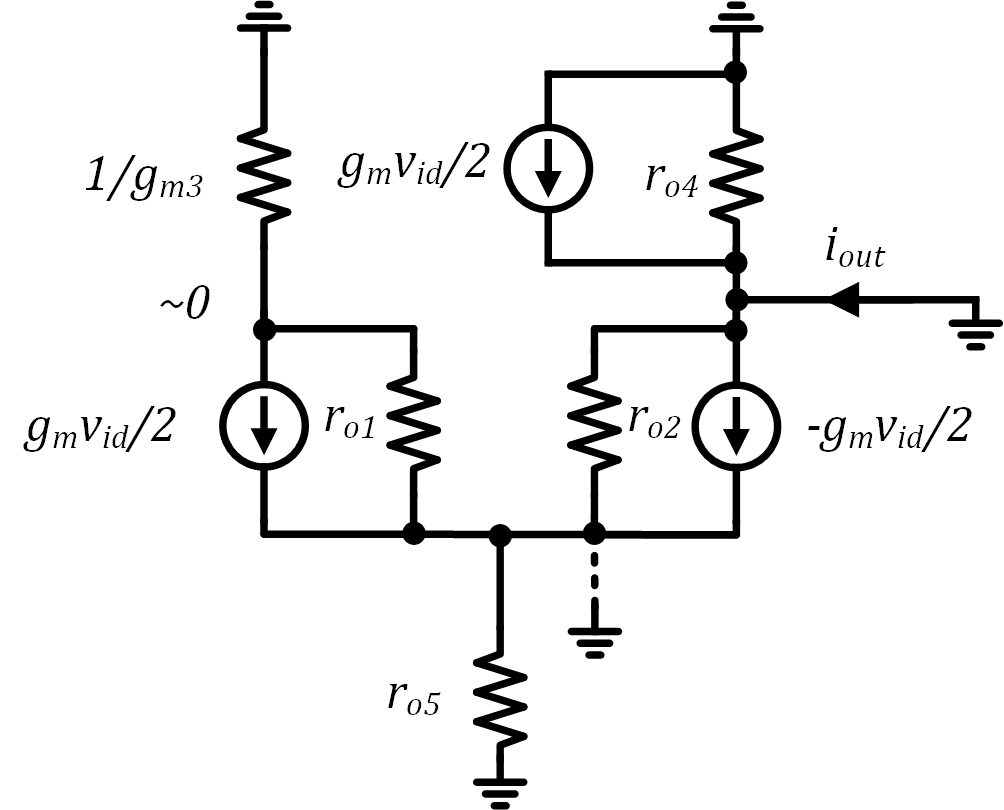

 - The short-circuit current is given by

\begin{align}
i_{out} &\approx -g_{m1,2} \left( \dfrac{v_{id}}{2} + \dfrac{v_{id}}{2} \right) \\
&\approx -g_{m1,2} v_{id} \\
\end{align}

 - As before, $G_m$ is determined by taking the ratio of the short-circuit current to the input voltage
 
\begin{equation}
\boxed{G_m = \dfrac{i_{out}}{v_{id}} \approx -g_{m1,2}}
\end{equation}

 - The small-signal voltage at drain of $M_1$ is small (i.e. approximately $0$)
 - The circuit is *approximately* symmetric, since the current through $r_{o1}$ is small relative to the contribution from $g_{m1}$ 
 - The source of $M_1$, $M_2$ can thus be viewed as a virtual ground

## Output resistance (R<sub>o</sub>)

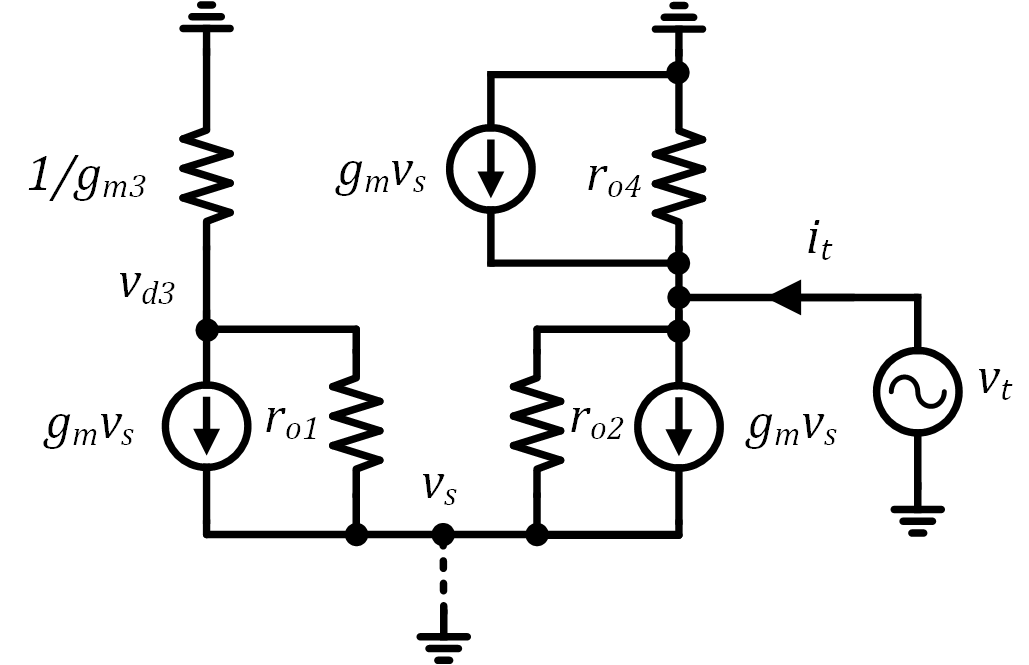

 - Due to the virtual ground, $v_s \approx 0$, and $i_t$ is given by

\begin{equation}
i_t \approx \dfrac{v_t}{r_{o2}} + \dfrac{v_t}{r_{o4}}
\end{equation}

- The output resistance is determined as the ratio $v_t/i_t$

\begin{equation}
\boxed{ R_o = \dfrac{v_t}{i_t} \approx r_{o2}||r_{o4} }
\end{equation}



 - Negligible differential current flows through tail resistance ($r_{o5}$), making it (approximately) a virtual ground
 - Output resistance is the parallel combination of $r_{o2}$ and $r_{o4}$

## Differential gain

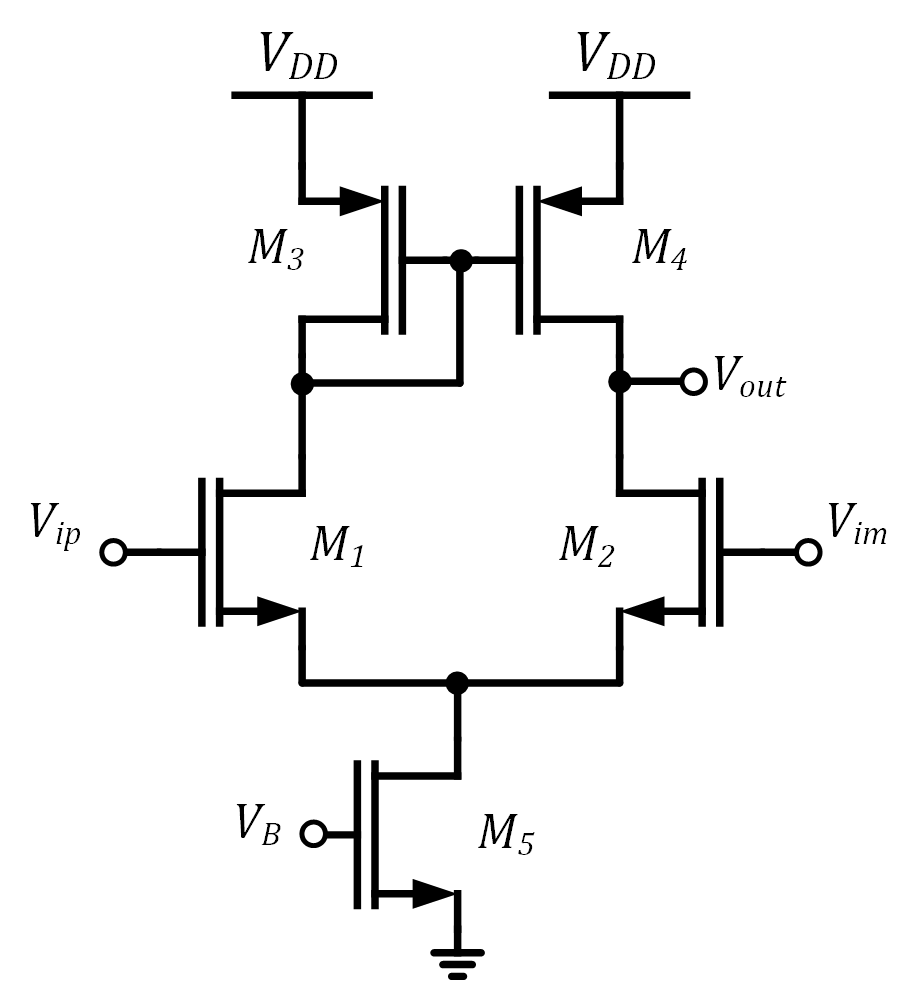

 - The differential transconductance and output resistance of the amplifier are given by

\begin{equation}
G_m \approx -g_{m1,2}
\end{equation}

\begin{equation}
R_o = r_{o1}||r_{o4}
\end{equation}

 - The differential gain is thus

\begin{equation}
\boxed{A_{v,d} = -G_m R_o \approx g_{m1,2}\cdot r_{o1}||r_{o4}}
\end{equation}

 - Differential input, single-ended output amplifier with $G_m R_o$ gain that forms the core of opamps and OTAs
 - In the ideal case, $R_o \rightarrow \infty$, so this amplifier is often viewed as an operational transconductance amplifier (OTA)
 - Due to mismatched impedances at drain of $M_1$ and $M_2$, common-mode rejection is inherently imperfect

## "Telescopic" cascode OTA

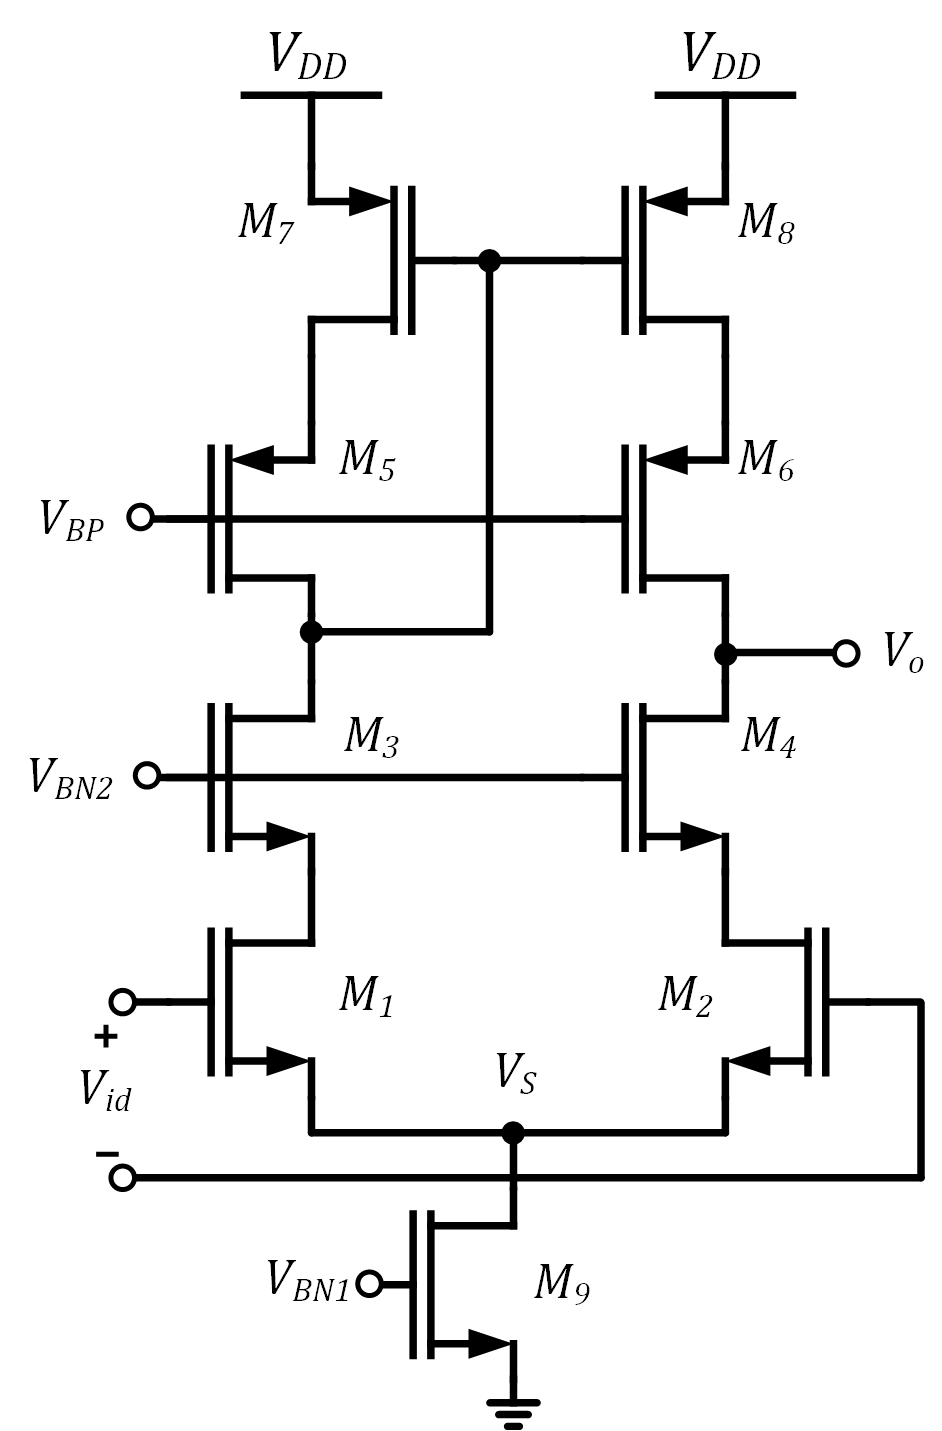

 - Analogous structure to the 5-transistor OTA, with cascoding
 
 - $V_{BN1}$ and $V_{BP}$ are generated using the biasing structures discussed previously
 
 - $V_{BN2}$ can be set relative to $V_S$ (dyanmic biasing), increasing the input range of the OTA
 
 - The gain is given approximately by
 
\begin{align}
A_v  = \dfrac{V_o}{V_{id}} &= -G_m R_o\\
\\
&= \boxed{-g_{m1,2}\cdot( g_{m4}r_{o4}r_{o2}|| g_{m6}r_{o6}r_{o8})}\\
\end{align}

## "Folded" cascode OTA

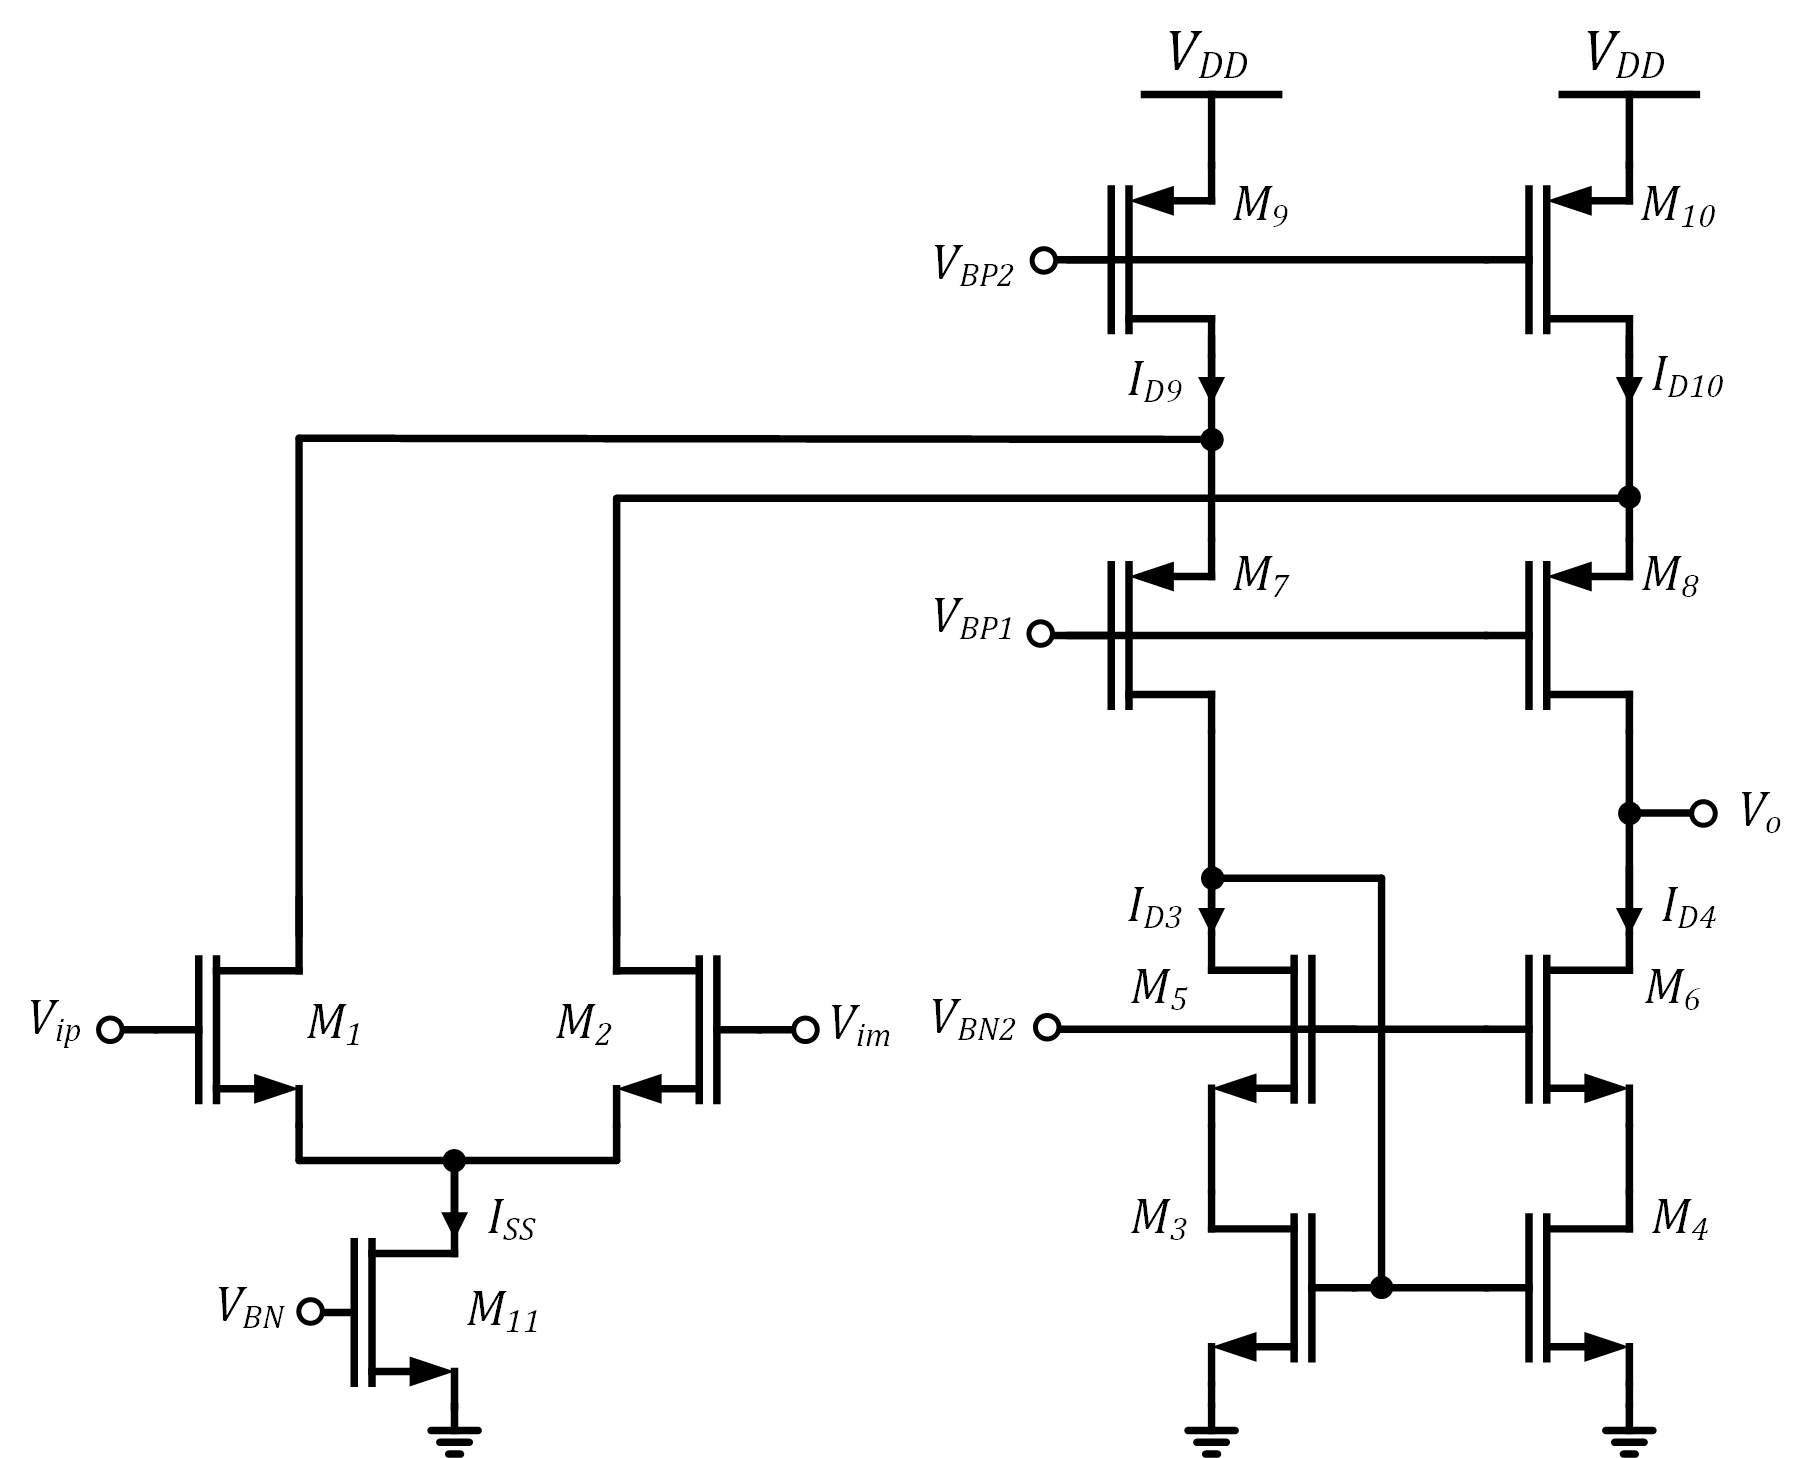

 - Cascode structure enabling greater output swing than the telescopic OTA
 
 - $V_{BN}$, $V_{BN2}$, $V_{BP1}$, and $V_{BP2}$ generated using current mirrors and cascode bias schemes
 
 - $M_9$ and $M_{10}$ supply current to both halves of the OTA:
 
\begin{equation}
I_{D9,10} = \dfrac{I_{SS}}{2} + I_{D3,4}
\end{equation}
 
 - The gain is given by
 
\begin{align}
A_v  = \dfrac{V_o}{V_{id}} &= -G_m R_o\\
\\
&= \boxed{-g_{m1,2}\cdot( g_{m6}r_{o4}r_{o6}|| g_{m8}r_{o10}r_{o8})}\\
\end{align}

## Summary

 - Differential signaling provides advantages with respect to common-mode noise, signal swing, and SNR
 - Differential pairs are current-biased using MOS current sources, enabling independent design of bias point and gain
 - High-gain opamps and OTAs are based on the 5-transistor OTA, which uses an "active" current mirror to achieve differential operation in the current domain
 - Cascode versions of the 5-transistor OTA increase gain, and form the core of most opamps